In [1]:
import pandas as pd
from pandas import DataFrame, Series
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Make sure the encoding is utf-8
import sys
reload(sys)
sys.setdefaultencoding("utf-8")

# Will be used to address character encoding later due to French names
from pandas.compat import u

In [2]:
%pdb off

**Source: **[In-, out- and net-migration estimates, by geographic regions of origin and destination, *Terminated*](http://www5.statcan.gc.ca/cansim/a26?lang=eng&retrLang=eng&id=1110030&paSer=&pattern=&stByVal=1&p1=1&p2=-1&tabMode=dataTable&csid=)

In [3]:
flowData = pd.read_csv('../TableD_01110030-eng.csv')
flowData.head()

,Ref_Date,GEO,Geographical classification,GEODEST,Geographical classification.1,MIGMOVE,Vector,Coordinate,Value
0,2000,"St. John's, Newfoundland and Labrador",10001,"Non-census metropolitan area, Newfoundland and...",NaN,In-migration,v21575997,1.2.1,3013.000
1,2001,"St. John's, Newfoundland and Labrador",10001,"Non-census metropolitan area, Newfoundland and...",NaN,In-migration,v21575997,1.2.1,3476.000
2,2002,"St. John's, Newfoundland and Labrador",10001,"Non-census metropolitan area, Newfoundland and...",NaN,In-migration,v21575997,1.2.1,3280.000
3,2003,"St. John's, Newfoundland and Labrador",10001,"Non-census metropolitan area, Newfoundland and...",NaN,In-migration,v21575997,1.2.1,3396.000
4,2004,"St. John's, Newfoundland and Labrador",10001,"Non-census metropolitan area, Newfoundland and...",NaN,In-migration,v21575997,1.2.1,3278.000


In [4]:
# Convert place names to unicode
flowData['GEO'] = flowData['GEO'].map(u)
flowData['GEODEST'] = flowData['GEODEST'].map(u)
flowData.head()

,Ref_Date,GEO,Geographical classification,GEODEST,Geographical classification.1,MIGMOVE,Vector,Coordinate,Value
0,2000,"St. John's, Newfoundland and Labrador",10001,"Non-census metropolitan area, Newfoundland and...",NaN,In-migration,v21575997,1.2.1,3013.000
1,2001,"St. John's, Newfoundland and Labrador",10001,"Non-census metropolitan area, Newfoundland and...",NaN,In-migration,v21575997,1.2.1,3476.000
2,2002,"St. John's, Newfoundland and Labrador",10001,"Non-census metropolitan area, Newfoundland and...",NaN,In-migration,v21575997,1.2.1,3280.000
3,2003,"St. John's, Newfoundland and Labrador",10001,"Non-census metropolitan area, Newfoundland and...",NaN,In-migration,v21575997,1.2.1,3396.000
4,2004,"St. John's, Newfoundland and Labrador",10001,"Non-census metropolitan area, Newfoundland and...",NaN,In-migration,v21575997,1.2.1,3278.000


In [5]:
# Remove unneeded columns
dropCols = ['Geographical classification',
           'Geographical classification.1',
           'Coordinate',
           'Vector']
flowData = flowData.drop(dropCols, axis=1)
flowData.head(10)

,Ref_Date,GEO,GEODEST,MIGMOVE,Value
0,2000,"St. John's, Newfoundland and Labrador","Non-census metropolitan area, Newfoundland and...",In-migration,3013.000
1,2001,"St. John's, Newfoundland and Labrador","Non-census metropolitan area, Newfoundland and...",In-migration,3476.000
2,2002,"St. John's, Newfoundland and Labrador","Non-census metropolitan area, Newfoundland and...",In-migration,3280.000
3,2003,"St. John's, Newfoundland and Labrador","Non-census metropolitan area, Newfoundland and...",In-migration,3396.000
4,2004,"St. John's, Newfoundland and Labrador","Non-census metropolitan area, Newfoundland and...",In-migration,3278.000
5,2005,"St. John's, Newfoundland and Labrador","Non-census metropolitan area, Newfoundland and...",In-migration,3426.000
6,2006,"St. John's, Newfoundland and Labrador","Non-census metropolitan area, Newfoundland and...",In-migration,3229.000
7,2007,"St. John's, Newfoundland and Labrador","Non-census metropolitan area, Newfoundland and...",In-migration,3403.000
8,2008,"St. John's, Newfoundland and Labrador","Non-census metropolitan area, Newfoundland and...",In-migration,3295.000
9,2009,"St. John's, Newfoundland and Labrador","Non-census metropolitan area, Newfoundland and...",In-migration,3272.000


In [6]:
# Rename columns
flowData = flowData.rename(columns={"GEO": "Origin", "GEODEST": "Destination"})

In [7]:
# Filter for only the most recent data
flowData2011 = flowData[flowData['Ref_Date'] == 2011].drop('Ref_Date', axis=1).reset_index(drop=True)
flowData2011.head()

,Origin,Destination,MIGMOVE,Value
0,"St. John's, Newfoundland and Labrador","Non-census metropolitan area, Newfoundland and...",In-migration,3402.000
1,"St. John's, Newfoundland and Labrador","Non-census metropolitan area, Newfoundland and...",Out-migration,1842.000
2,"St. John's, Newfoundland and Labrador","Non-census metropolitan area, Newfoundland and...",Net-migration,1560.000
3,"St. John's, Newfoundland and Labrador","Non-census metropolitan area, Prince Edward Is...",In-migration,28.000
4,"St. John's, Newfoundland and Labrador","Non-census metropolitan area, Prince Edward Is...",Out-migration,47.000


In [8]:
# Convert that Value column to a numeric data type
flowData2011['Value'] = flowData2011['Value'].convert_objects(convert_numeric=True)

In [9]:
# Remove all the non-census areas so we can geocode the cities that qualify as CMAs
flowData2011_cma = flowData2011[~flowData2011['Destination'].str.contains('Non-census')]
flowData2011_cma = flowData2011_cma[~flowData2011_cma['Origin'].str.contains('Non-census')]
flowData2011_cma.head()

,Origin,Destination,MIGMOVE,Value
6,"St. John's, Newfoundland and Labrador","Halifax, Nova Scotia",In-migration,392
7,"St. John's, Newfoundland and Labrador","Halifax, Nova Scotia",Out-migration,254
8,"St. John's, Newfoundland and Labrador","Halifax, Nova Scotia",Net-migration,138
12,"St. John's, Newfoundland and Labrador","Moncton, New Brunswick",In-migration,67
13,"St. John's, Newfoundland and Labrador","Moncton, New Brunswick",Out-migration,37


In [10]:
outMig = flowData2011_cma[flowData2011_cma['MIGMOVE'] == "Out-migration"].drop('MIGMOVE', axis=1).reset_index(drop=True)
outMig.head()

,Origin,Destination,Value
0,"St. John's, Newfoundland and Labrador","Halifax, Nova Scotia",254
1,"St. John's, Newfoundland and Labrador","Moncton, New Brunswick",37
2,"St. John's, Newfoundland and Labrador","Saint John, New Brunswick",25
3,"St. John's, Newfoundland and Labrador","Saguenay, Quebec",0
4,"St. John's, Newfoundland and Labrador","Québec, Quebec",7


In [11]:
outMigPiv = outMig.pivot('Origin', 'Destination', 'Value')
outMigPiv.head()

Destination,"Abbotsford-Mission, British Columbia","Barrie, Ontario","Brantford, Ontario","Calgary, Alberta","Edmonton, Alberta","Greater Sudbury / Grand Sudbury, Ontario","Guelph, Ontario","Halifax, Nova Scotia","Hamilton, Ontario","Kelowna, British Columbia",...,"Sherbrooke, Quebec","St. Catharines-Niagara, Ontario","St. John's, Newfoundland and Labrador","Thunder Bay, Ontario","Toronto, Ontario","Trois-Rivières, Quebec","Vancouver, British Columbia","Victoria, British Columbia","Windsor, Ontario","Winnipeg, Manitoba"
Origin,,,,,,,,,,,,,,,,,,,,,
"Abbotsford-Mission, British Columbia",NaN,6,2,317,263,0,4,14,31,161,...,0,16,11,4,156,2,3966,151,11,120
"Barrie, Ontario",11,NaN,20,97,122,99,45,78,186,7,...,0,136,20,30,2918,0,101,46,57,43
"Brantford, Ontario",1,42,NaN,92,46,35,75,28,901,2,...,0,132,6,21,545,1,32,10,39,15
"Calgary, Alberta",158,82,36,NaN,3774,40,59,381,269,833,...,11,98,195,109,2219,3,2987,799,224,556
"Edmonton, Alberta",172,72,28,5143,NaN,32,55,300,235,669,...,32,119,273,40,1513,16,2257,695,129,440


In [12]:
# Since there is such a range in values, let's put this on a log scale
log_scale = lambda x: np.log10(x)
outMigPivLog = outMigPiv.applymap(log_scale).replace([np.inf, -np.inf], 0)

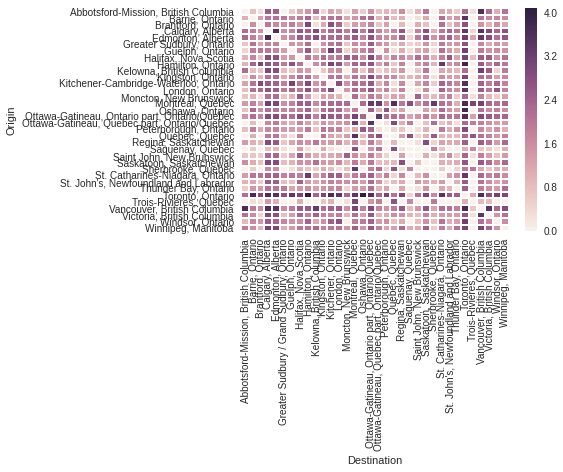

In [13]:
sns.heatmap(outMigPivLog)

**Source:** [Geocoder.ca](http://geocoder.ca/?freedata=1)

In [45]:
# Get mapping of cities to centroids
centroids = pd.read_csv('./canada_cities.csv', header=None, names=['Location', 'Province', 'Latitude', 'Longitude'])

In [46]:
from titlecase import titlecase
title_u = lambda x: u(x).title()

In [47]:
centroids['Location'] = centroids['Location'].map(title_u)
centroids.head(15)

,Location,Province,Latitude,Longitude
0,100 Mile House,BC,51.643010,121.295022
1,100 Mile House,BC,51.635034,121.299263
2,100 Mile House,BC,51.654512,121.309834
3,150 Mile House,BC,52.116540,121.852768
4,70 Mile House,BC,51.312913,121.394867
5,Abbey,SK,50.733394,108.751430
6,Abbotsford,BC,49.052273,122.305952
7,Abbotsford,QC,45.436724,72.890350
8,Abee,AB,54.197541,113.038456
9,Abercorn,QC,45.026492,72.664253


In [51]:
provAbbr = {'BC' : 'British Columbia',
           'SK' : 'Saskatchewan',
           'QC' : 'Quebec',
           'AB' : 'Alberta',
           'NB' : 'New Brunswick',
           'NS' : 'Nova Scotia',
           'ON' : 'Ontario',
           'NL' : 'Newfoundland',
           'PE' : 'PEI',
           'MB' : 'Manitoba',
           'NT' : 'Northwest Territories',
           'YT' : 'Yukon',
           'NU' : 'Nunavut'}
centroids['Province'] = centroids['Province'].replace(provAbbr)
centroids.head()

,Location,Province,Latitude,Longitude
0,100 Mile House,British Columbia,51.643010,121.295022
1,100 Mile House,British Columbia,51.635034,121.299263
2,100 Mile House,British Columbia,51.654512,121.309834
3,150 Mile House,British Columbia,52.116540,121.852768
4,70 Mile House,British Columbia,51.312913,121.394867


In [55]:
centroids = centroids.drop_duplicates(subset=['Location', 'Province'])
centroids.head()

,Location,Province,Latitude,Longitude
0,100 Mile House,British Columbia,51.643010,121.295022
3,150 Mile House,British Columbia,52.116540,121.852768
4,70 Mile House,British Columbia,51.312913,121.394867
5,Abbey,Saskatchewan,50.733394,108.751430
6,Abbotsford,British Columbia,49.052273,122.305952
